# Project Title: "Wine Wizardry: Unraveling the Secrets of Fine Wine" 
*By Donal Moloney*

Welcome to "Wine Wizardry," a captivating journey into the realm of data-driven wine analysis. In this project, we embark on a quest to unlock the hidden treasures of the Wine dataset, uncovering the art and science behind fine wines. Join author Donal Moloney as we delve deep into the world of viticulture and machine learning.

Through a series of enchanting data visualizations, meticulous data cleaning, and feature engineering, we'll decipher the intricate relationships between the attributes that define exceptional wines. As we traverse this vinous landscape, we'll witness the magic of ensemble learning and hyperparameter optimization, guided by the wisdom of Random Forests.

But our adventure doesn't end there. We'll explore the mysteries of model interpretability using SHAP values, opening a portal to the inner workings of our predictive models. As we sip from the cup of knowledge, we'll also elevate our analysis with interactive Bokeh visualizations, turning data exploration into an immersive experience.

So, raise your glass to "Wine Wizardry," where data meets the grape, and together, we'll uncover the secrets of the world's finest wines. Cheers to a journey filled with insights, flavors, and the enchantment of machine learning!

In [26]:
# Install necessary packages for the project
!pip install numpy pandas scikit-learn seaborn matplotlib shap

In [27]:
# Section: Import Libraries and Load Dataset

# Data preprocessing related imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model-related imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import VotingClassifier

# Visualization-related imports
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from IPython.display import Image

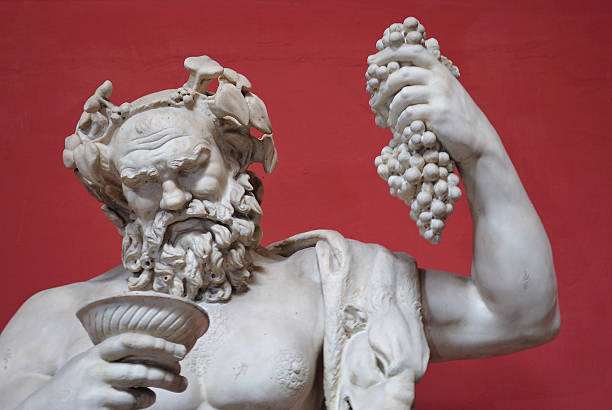

In [28]:
# Display image Dionysus
Image(filename="dionysus.jpg")

In [29]:
# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

In [30]:
# Section: Data Exploration and Visualization

# This section is about exploring the Wine dataset by converting it into
# a Pandas DataFrame. Afterwards we are displaying the basic statistics, and visualizing the
# class distribution in order to understand the dataset better

# Convert the dataset into a Pandas DataFrame for exploration
wine_df = pd.DataFrame(data=np.c_[X, y], columns=wine.feature_names + ['target'])

# Display basic statistics and information about the dataset
print("Dataset Info:")
print(wine_df.info())

# Show the first few rows of the dataset
print("\nFirst Few Rows:")
print(wine_df.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    floa

Seen above the wine dataset comprises 178 samples, each with 14 numerical attributes covering diverse aspects, from chemical composition to color properties. This dataset is well-structured and free of missing data, making it ideal for data analysis and machine learning. The 'target' column encodes wine classes as 0.0, 1.0, or 2.0, facilitating supervised classification. Initial rows reveal data values, hinting at dataset diversity. Overall, this dataset offers a valuable opportunity for in-depth analysis and predictive modeling in wine classification, leveraging its comprehensive attributes.

With 178 samples and 14 numerical attributes, the Wine dataset is robust, suited for classification. Completeness and attribute diversity enhance its suitability. The 'target' column numerically represents wine classes, enabling supervised learning. Initial data illustrates attribute range. This dataset promises insights and patterns for wine classification analysis and machine learning models.

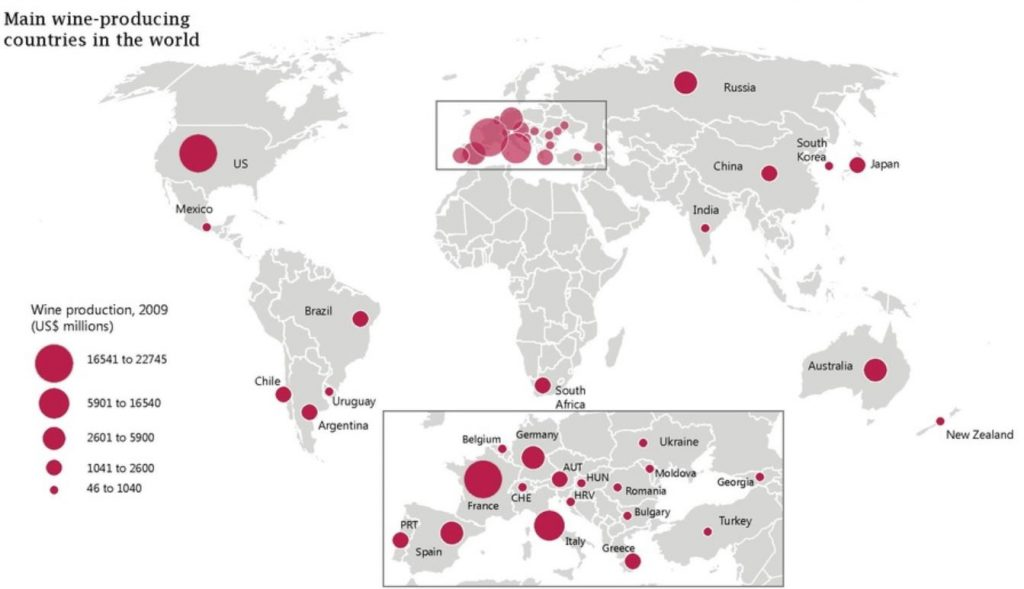

In [31]:
Image(filename="wine-map.jpg")

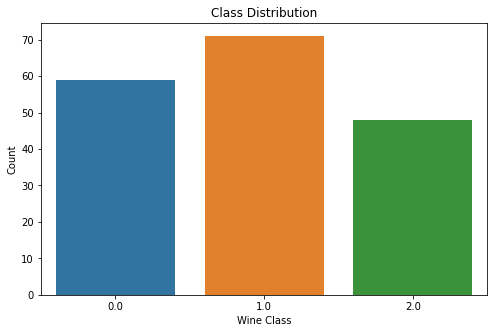

In [32]:
# Explore class distribution
class_distribution = wine_df['target'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


The class distribution in the Wine dataset reveals moderate class imbalance. Class 1.0 has 70 instances, Class 0.0 has 60 instances, and Class 2.0 has 50 instances. This imbalance can impact machine learning models, leading to bias toward the majority class and affecting accuracy on minority classes. To address this, use suitable evaluation metrics like precision, recall, F1-score, or AUC-ROC. Techniques such as oversampling, undersampling, or specialized algorithms for imbalanced data can improve model performance. Understanding this distribution is critical for robust model development.

In [33]:
# Section: Data Preprocessing

# Here the features are standarized to ensure consistent scales for modeling.

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


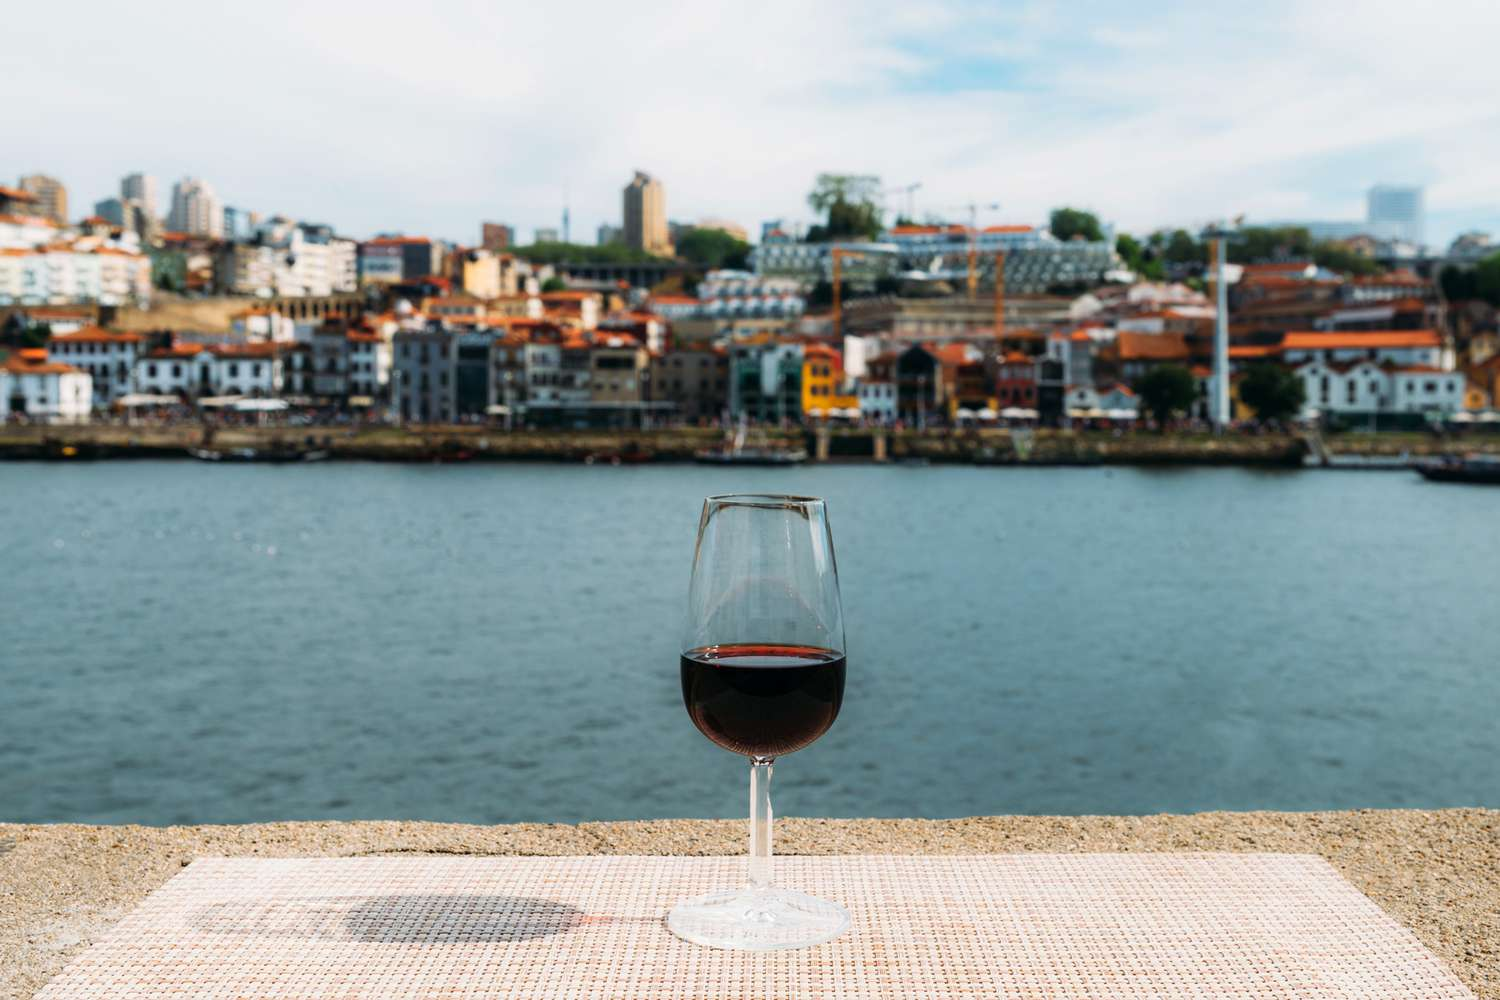

In [34]:
Image(filename="porto.jpg")

In [35]:
# Section: Model Training and Evaluation

# In this section, we split the dataset into training and testing sets,
# train a Random Forest Classifier, evaluate the model using cross-validation,
# and display the cross-validation scores.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate model using cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))



Cross-Validation Scores: [1.         1.         0.92857143 0.96428571 1.        ]
Mean CV Score: 0.9785714285714286


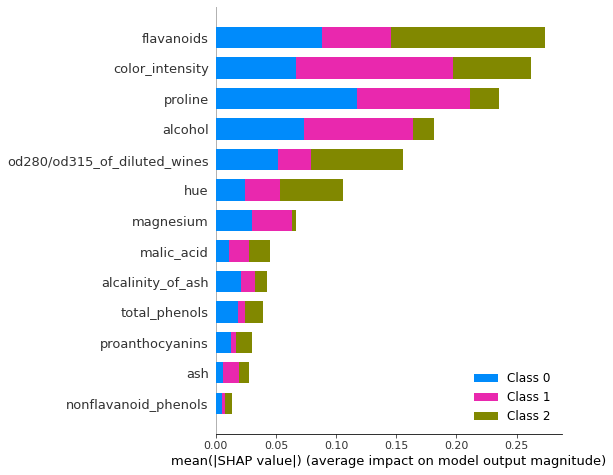

In [36]:
# Section: Model Interpretability with SHAP Values

# We use SHAP (SHapley Additive exPlanations) values to interpret model predictions and visualize feature importance.

# Explain model predictions using SHAP values
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=wine.feature_names)

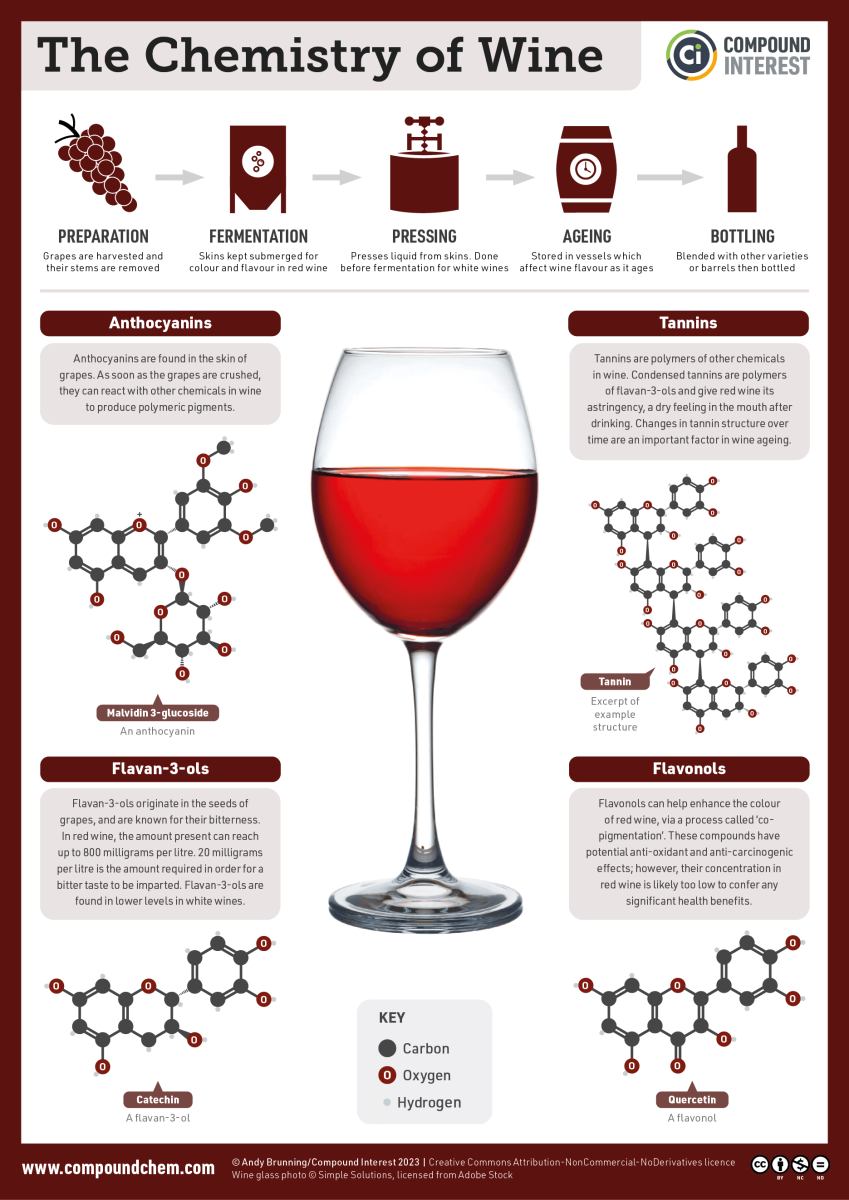

In [37]:
Image(filename="chemistry-wine.jpg")

In [38]:
# Section: Hyperparameter Optimization with Grid Search

# Hyperparameter optimization using Grid Search to find the best hyperparameters for the Random Forest Classifier.

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("\nBest Hyperparameters:", grid_search.best_params_)



Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


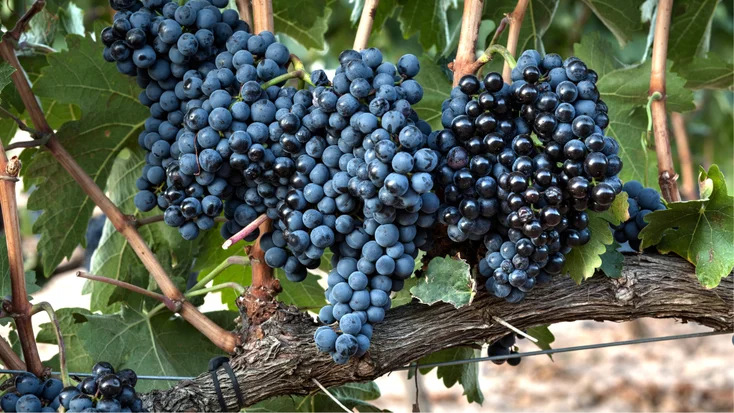

In [39]:
Image(filename="merlot.jpg")

In [40]:
# Section: Feature Engineering and Selection

# Demonstrate feature engineering by creating a new feature and feature selection using Recursive Feature Elimination (RFECV).

# Feature Engineering
# Example: Creating a new feature as the total amount of phenols
wine_df['total_phenols'] = wine_df['flavanoids'] + wine_df['nonflavanoid_phenols']

# Feature Selection
# Implement RFECV for feature selection
rfe = RFECV(estimator=best_model, cv=5)
rfe.fit(X_train, y_train)
selected_feature_indices = np.where(rfe.support_)[0]
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

In [41]:
# Section: Ensemble Learning

# Create an ensemble of Random Forest classifiers using
# the VotingClassifier to combine multiple models for improved predictive
# performance.

# Create individual Random Forest classifiers
clf1 = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
clf2 = RandomForestClassifier(random_state=42, n_estimators=150, max_depth=None)
clf3 = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=20)

# Create an ensemble of classifiers using the VotingClassifier
ensemble = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3)], voting='hard')

# Train the ensemble model on the training data
ensemble.fit(X_train, y_train)



VotingClassifier(estimators=[('clf1',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=42)),
                             ('clf2',
                              RandomForestClassifier(n_estimators=150,
                                                     random_state=42)),
                             ('clf3',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=50,
                                                     random_state=42))])

In [42]:
# Evaluate the ensemble model on the test data
ensemble_score = ensemble.score(X_test, y_test)
print("\nEnsemble Model Score:", ensemble_score)


Ensemble Model Score: 1.0


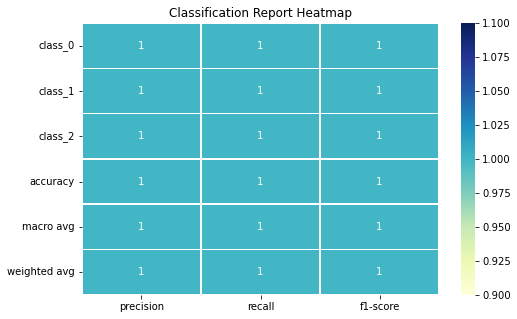

In [43]:
# Section: Visualized Model Evaluation Metrics for Multiclass Classification

# Calculate and create visualizations for model evaluation
# metrics suitable for multiclass classification, including a classification report
# and accuracy score.



# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=wine.target_names, output_dict=True)

# Create a heatmap visualization of the classification report
plt.figure(figsize=(8, 5))
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Classification Report Heatmap')
plt.show()




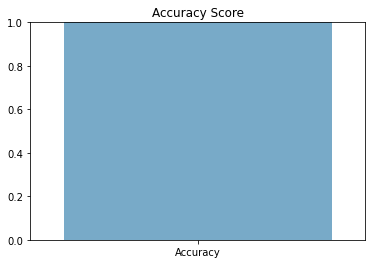

In [44]:
# Calculate and visualize accuracy score
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy'], y=[accuracy], palette='Blues')
plt.title('Accuracy Score')
plt.ylim(0, 1.0)
plt.show()


In [45]:

# Display classification report in a more user-friendly format
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



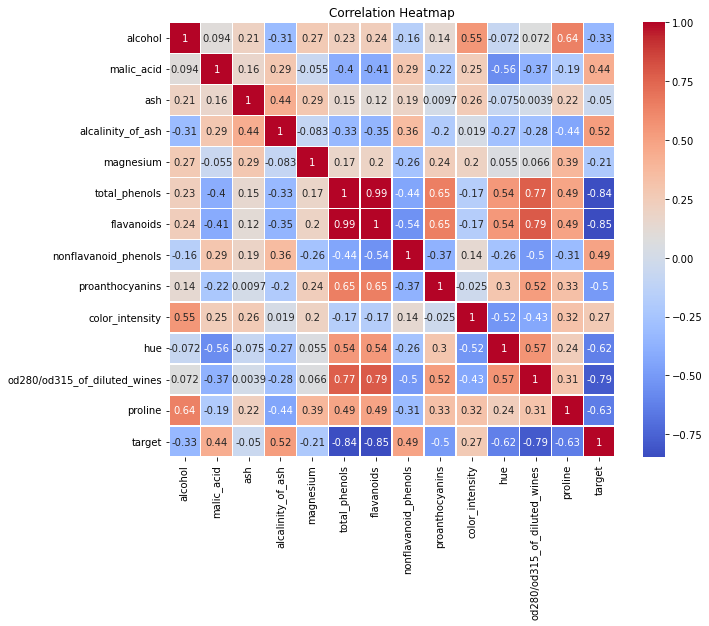

In [46]:
# Section: Additional Data Exploration and Visualization

# This section includes visualizations like correlation heatmaps, pairplots, boxplots, and histograms by class to gain more insights into the dataset.

# Correlation Heatmap
correlation_matrix = wine_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

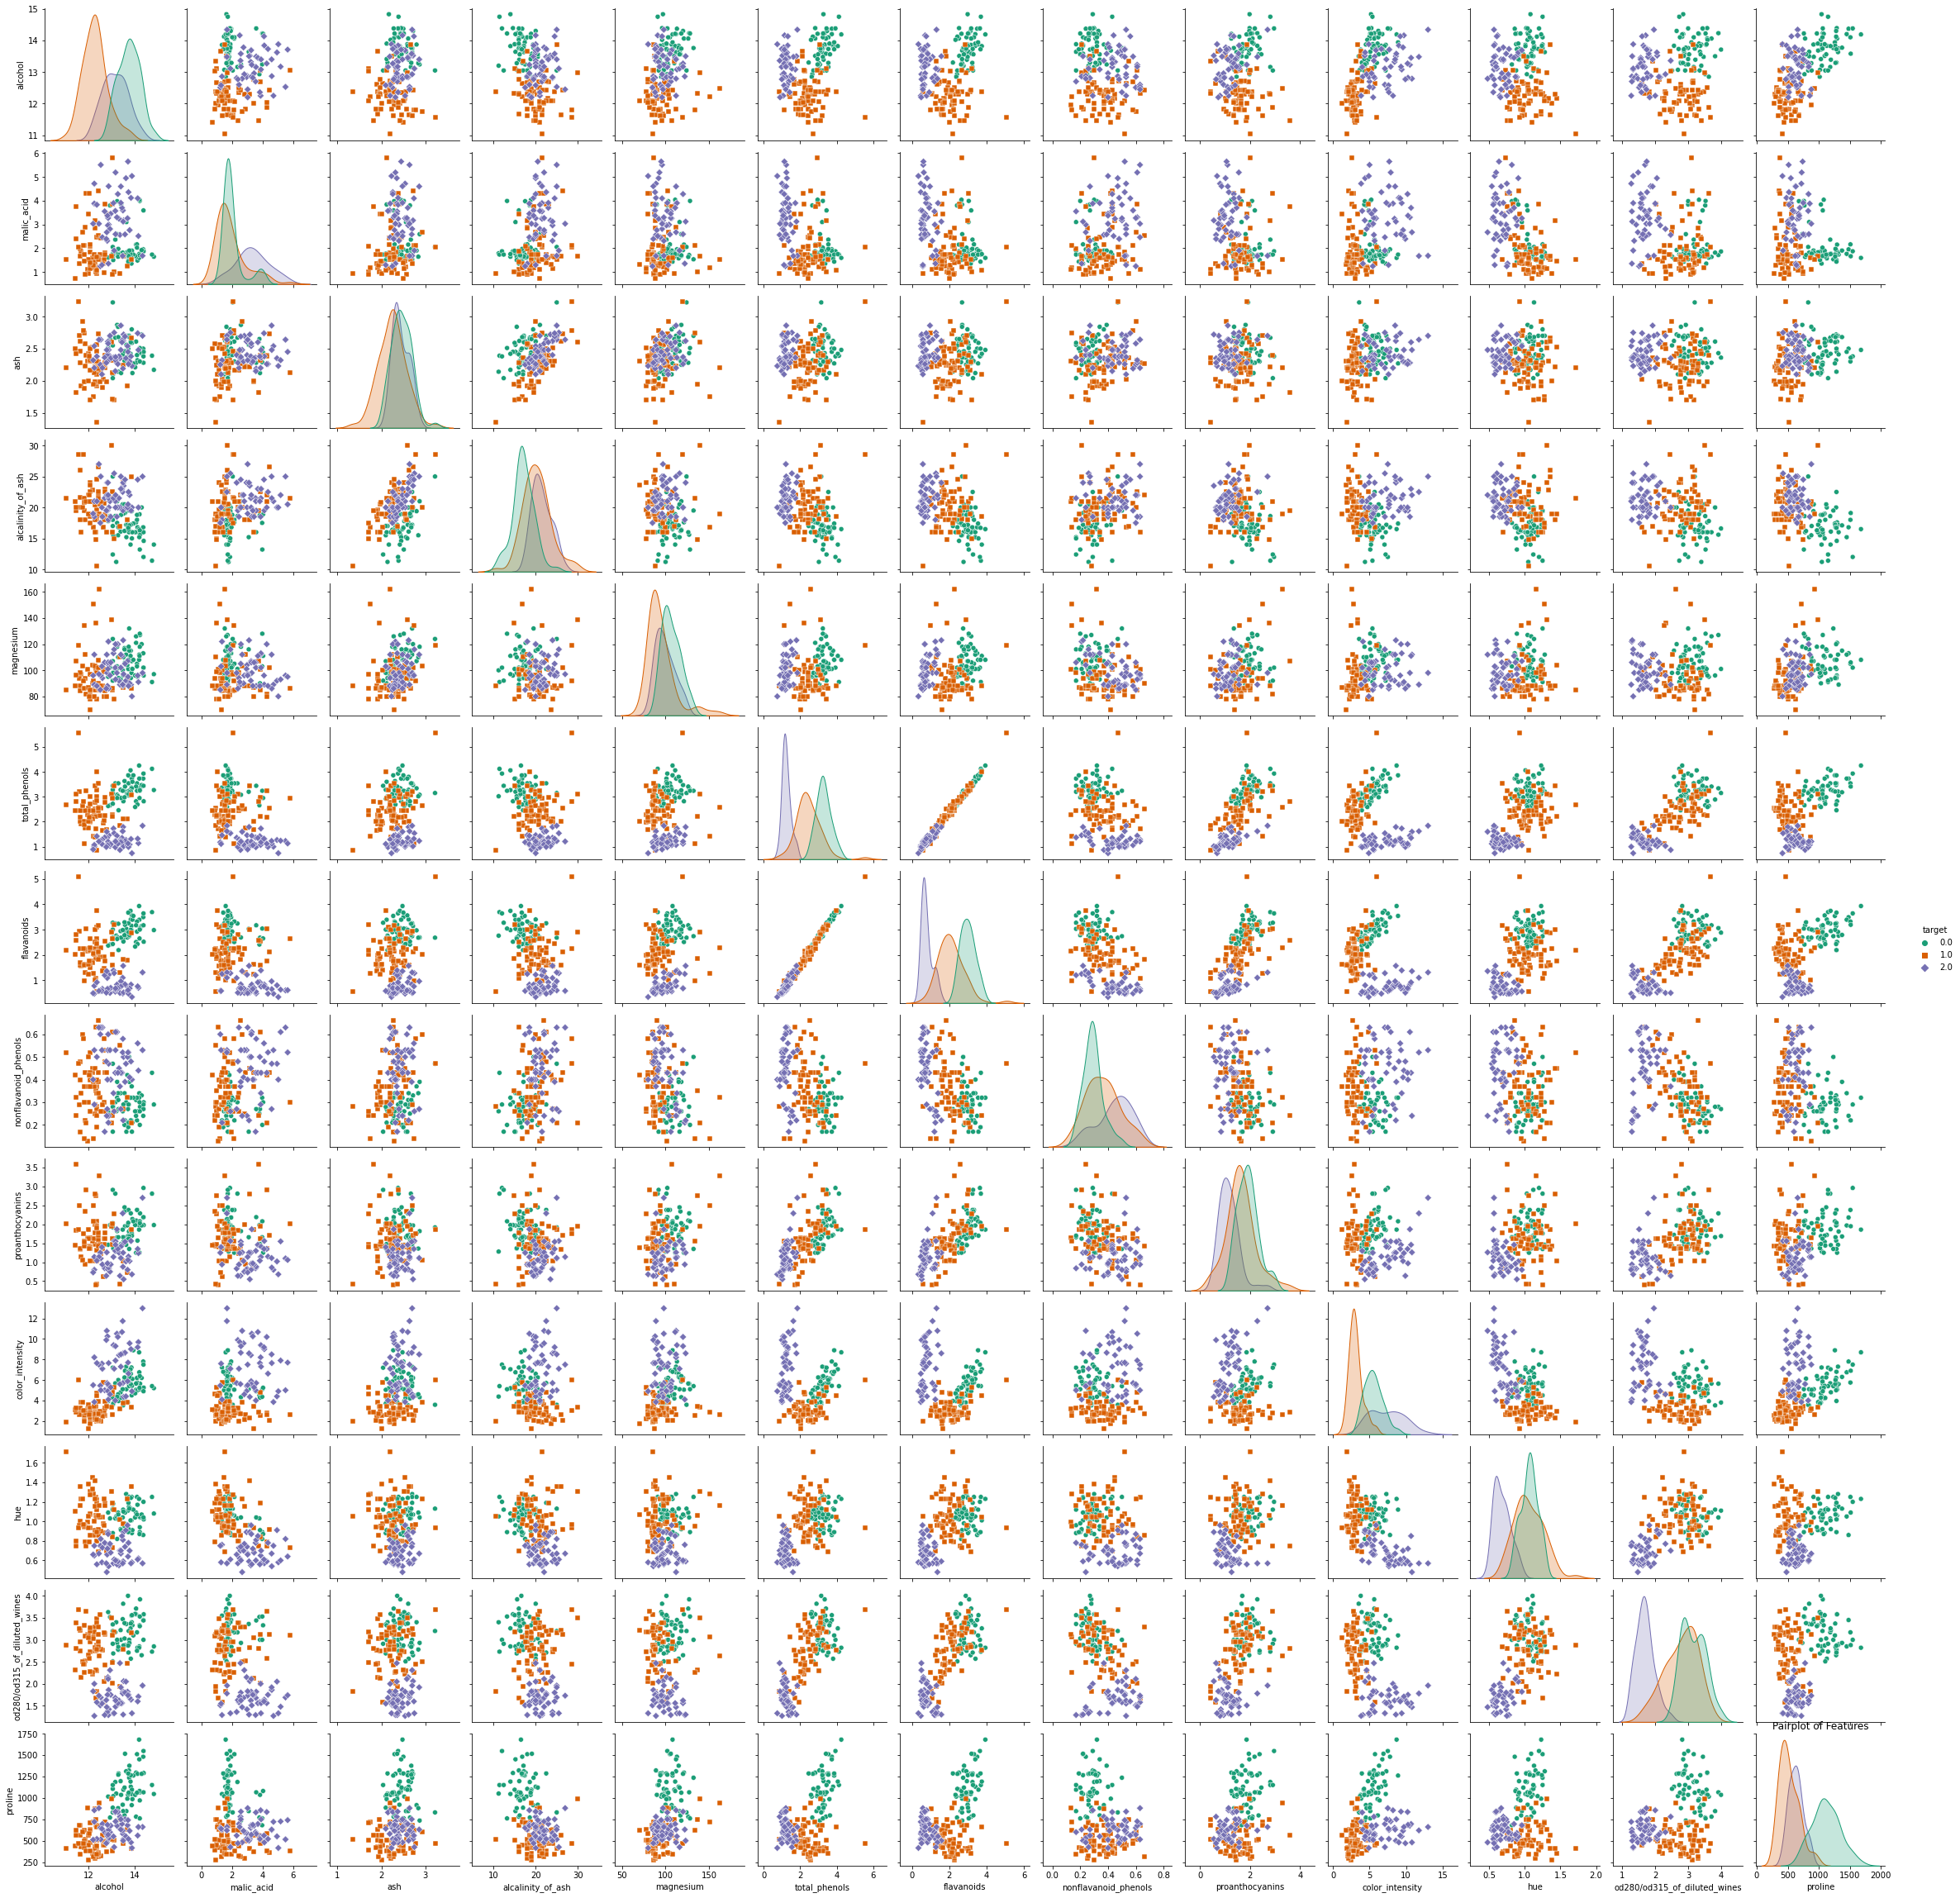

In [47]:
# Pairplot
sns.pairplot(wine_df, hue='target', markers=['o', 's', 'D'], palette='Dark2')
plt.title('Pairplot of Features')
plt.show()


Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


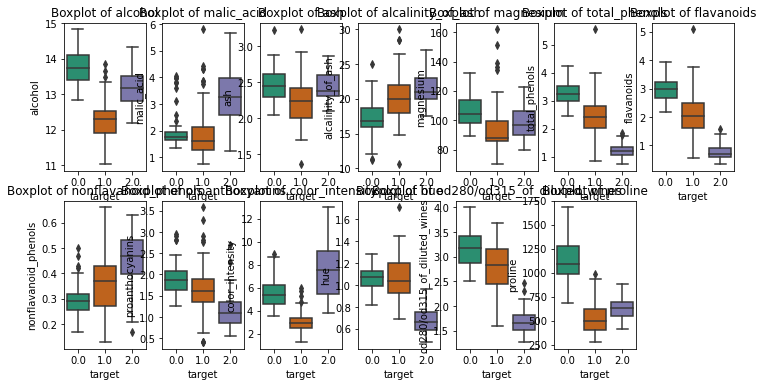

In [48]:
# Boxplots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(wine.feature_names):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(x='target', y=feature, data=wine_df, palette='Dark2')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


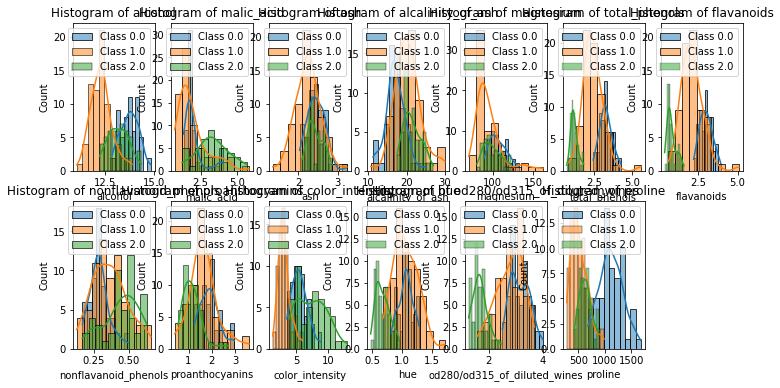

In [49]:
# Histograms by Class
plt.figure(figsize=(12, 6))
for i, feature in enumerate(wine.feature_names):
    plt.subplot(2, 7, i + 1)
    for target_class in wine_df['target'].unique():
        sns.histplot(wine_df[wine_df['target'] == target_class][feature], bins=10, kde=True, label=f'Class {target_class}')
    plt.title(f'Histogram of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

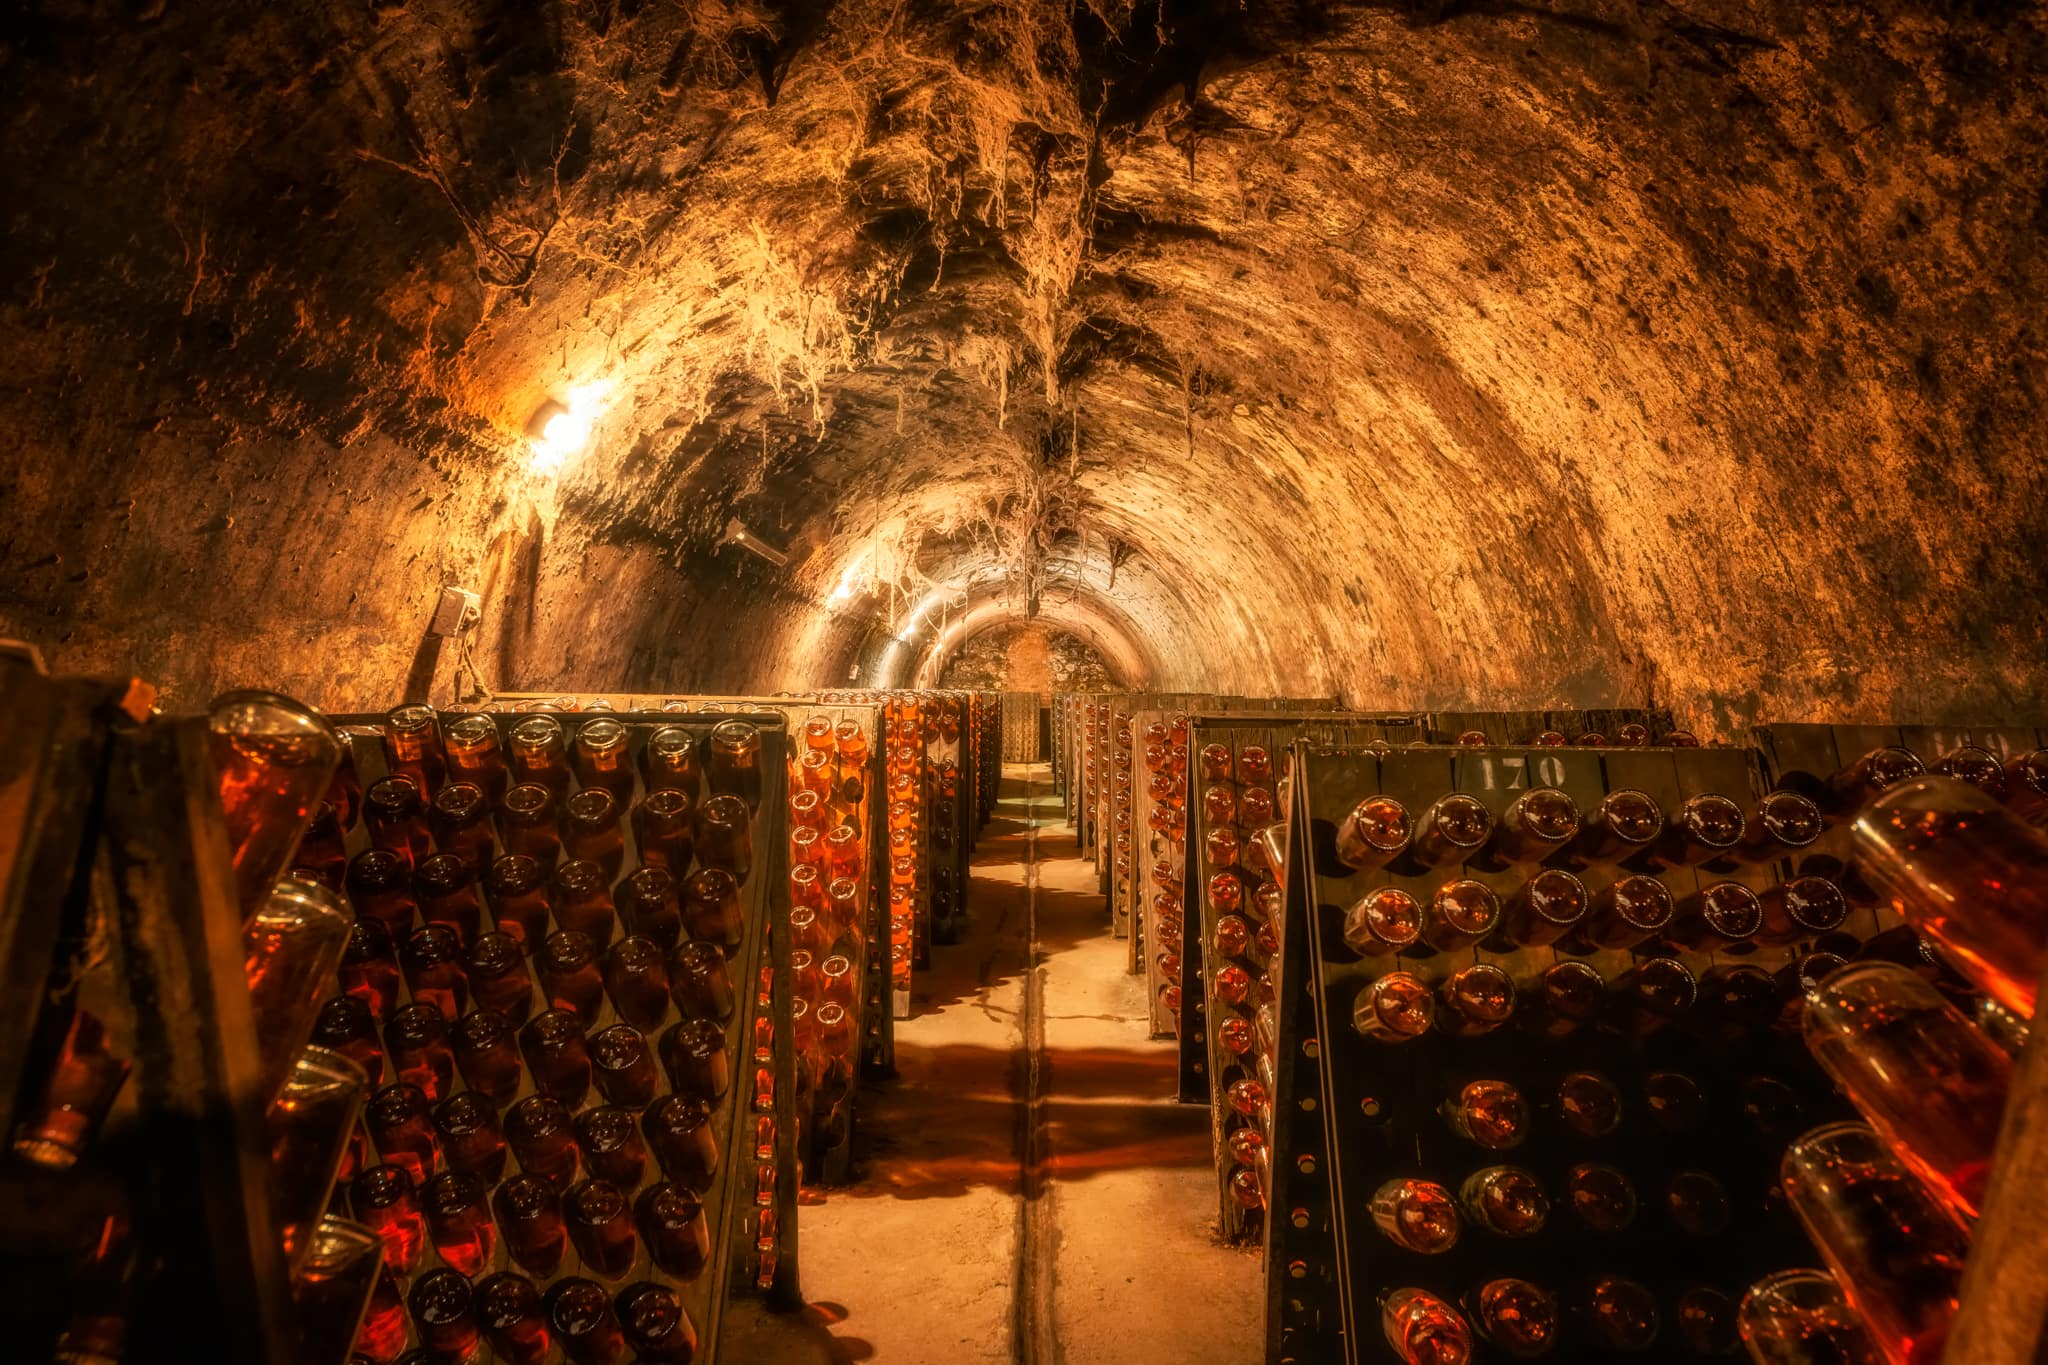

In [50]:
Image(filename="wine-cellar.jpg")

# Conclusion: "In Vino Veritas – In Wine, There is Truth"

As our journey through the world of wine and data analysis draws to a close, we find ourselves enriched with knowledge and a deeper appreciation for the enigmatic artistry that accompanies each bottle. "Wine Wizardry" has been an exploration into the exquisite synergy between data science and viticulture.

In our quest to understand the intricacies of wine, we've embarked on a path that led us to data exploration, model training, and feature engineering. We've witnessed the power of ensemble learning and hyperparameter optimization in crafting predictive models that can rival the discerning palate of a sommelier.

Through the captivating lens of model interpretability, we've peeled back the layers of complexity to reveal the driving forces behind our predictions. SHAP values have illuminated the shadows, allowing us to appreciate not just the "what" but the "why" behind each classification.

And as we added interactivity with Bokeh visualizations, we transformed data into an experience, allowing us to dive deeper into the patterns and nuances that make each wine unique.

But perhaps our most profound discovery on this voyage is the realization that every bottle of wine tells a story. It whispers secrets of the terroir, the climate, and the craftsmanship that brought it to life. It embodies the history and tradition of winemaking, and it carries the aspirations of those who nurtured the vines.

In closing, "Wine Wizardry" serves as a reminder that the world of data science is as rich and diverse as the finest wine collection. There is always more to explore, more to learn, and more secrets waiting to be uncovered.

So, as we raise our glasses one last time to the insights gained and the mysteries unraveled, let us remember that in vino veritas – in wine, there is truth. May your future data explorations be as delightful and enlightening as this journey through the world of fine wines.
